<a href="https://colab.research.google.com/github/Nikita921999/project/blob/main/Copy_of_Efficient_Frontier_Short_sell_allowed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import random

In [ ]:
n = int(input("Enter the number of stocks in your universe (between 10 and 50): "))

Enter the number of stocks in your universe (between 10 and 50): 10


#Returns 


In [ ]:
# Load the dataset into a Pandas DataFrame and calculate weekly returns

df = pd.read_csv('/content/Fifty_stocks.csv')
df=df.drop('Date',axis=1)
# select n random stocks from dataframe
stocks = random.sample(list(df.columns), n)
returns = df[stocks].pct_change().dropna()


In [ ]:
returns

,HDFC.NS,EICHERMOT.NS,M&M.NS,BRITANNIA.NS,VEDL.NS,RELIANCE.NS,HINDALCO.NS,GRASIM.NS,MRF.NS,ABBOTINDIA.NS
1,-0.046548,-0.033512,-0.019380,0.000965,0.019472,0.028624,0.043550,0.011413,-0.006058,0.008607
2,-0.008608,-0.078363,-0.022586,0.016292,0.027727,0.023023,-0.010579,0.000477,-0.000997,-0.000726
3,0.010124,-0.035365,-0.000578,0.022861,-0.000600,0.039726,-0.008840,0.010961,-0.000222,0.003270
4,-0.005503,0.070203,0.013294,-0.018177,0.068387,-0.025033,-0.013166,-0.005028,0.005158,-0.003622
5,0.015099,-0.021866,-0.054193,-0.002456,-0.055587,-0.013513,-0.039508,-0.017688,0.010430,-0.000727
...,...,...,...,...,...,...,...,...,...,...
1069,-0.002208,-0.031462,-0.016246,-0.001329,-0.011454,0.003285,-0.057653,0.011724,-0.040736,-0.006283
1070,0.001822,0.022616,-0.017540,-0.019350,0.010621,0.044316,-0.008427,0.004678,-0.003718,-0.025307
1071,-0.043232,-0.024170,-0.045695,-0.020008,-0.062261,-0.023154,-0.033178,-0.041237,-0.021818,-0.003047
1072,0.026754,-0.024426,-0.009061,-0.006888,-0.017660,0.000713,0.003973,0.013363,-0.005041,0.000365


In [ ]:
# Define a lambda function to multiply each value by 100
multiply_by_100 = lambda x: x * 100

# Apply the lambda function to all columns of the DataFrame
returns = returns.apply(multiply_by_100)

# Print the updated DataFrame
print(returns.head())

    HDFC.NS  EICHERMOT.NS    M&M.NS  BRITANNIA.NS   VEDL.NS  RELIANCE.NS  \
1 -4.654841     -3.351212 -1.937985      0.096510  1.947224     2.862400   
2 -0.860763     -7.836328 -2.258617      1.629214  2.772684     2.302306   
3  1.012358     -3.536507 -0.057753      2.286092 -0.059966     3.972599   
4 -0.550346      7.020305  1.329448     -1.817663  6.838664    -2.503326   
5  1.509899     -2.186602 -5.419287     -0.245593 -5.558681    -1.351315   

   HINDALCO.NS  GRASIM.NS    MRF.NS  ABBOTINDIA.NS  
1     4.354992   1.141289 -0.605773       0.860655  
2    -1.057895   0.047698 -0.099685      -0.072611  
3    -0.883981   1.096116 -0.022179       0.327016  
4    -1.316558  -0.502826  0.515840      -0.362191  
5    -3.950777  -1.768789  1.042993      -0.072726  


#Mean and variance of returns


In [ ]:
# Calculate the variance of each feature and store in a Pandas Series
means= returns.mean()
variances = returns.var()

# Convert the Pandas Series to numpy arrays
means_arr = means.to_numpy()
variances_arr = variances.to_numpy()

# Print the arrays of means and variances
print(means_arr)
print(variances_arr)


[0.47678571 0.74688836 0.58617597 0.50252887 0.79686417 0.5029265
 0.39801071 0.44962422 0.55651448 0.54397781]
[20.50979802 30.7274952  25.01402632 12.52675804 48.26046577 19.54882332
 36.44761837 20.20289647 25.60845272 41.2894511 ]


In [ ]:
annualized_returns= means_arr*52
annualized_variance= variances_arr*52

In [ ]:
print(annualized_returns)
print(annualized_variance)

[24.79285681 38.83819471 30.48115019 26.13150104 41.43693668 26.15217806
 20.69655674 23.38045948 28.93875292 28.28684623]
[1066.50949692 1597.82975044 1300.7293684   651.39141811 2509.54422028
 1016.53881259 1895.27615542 1050.55061665 1331.63954118 2147.05145743]


#Calculate Excess Returns


In [ ]:

# Define a lambda function to subtract the column mean from each value
subtract_mean = lambda x: x - x.mean()

# Apply the lambda function to all columns of the DataFrame
excess_df = returns.apply(subtract_mean)

# Print the updated DataFrame
print(excess_df.head())



    HDFC.NS  EICHERMOT.NS    M&M.NS  BRITANNIA.NS   VEDL.NS  RELIANCE.NS  \
1 -5.131627     -4.098101 -2.524161     -0.406019  1.150360     2.359473   
2 -1.337549     -8.583216 -2.844793      1.126685  1.975819     1.799380   
3  0.535572     -4.283395 -0.643929      1.783563 -0.856830     3.469672   
4 -1.027132      6.273416  0.743272     -2.320192  6.041800    -3.006253   
5  1.033114     -2.933491 -6.005463     -0.748122 -6.355545    -1.854241   

   HINDALCO.NS  GRASIM.NS    MRF.NS  ABBOTINDIA.NS  
1     3.956982   0.691665 -1.162287       0.316677  
2    -1.455906  -0.401927 -0.656200      -0.616589  
3    -1.281992   0.646492 -0.578694      -0.216962  
4    -1.714569  -0.952450 -0.040675      -0.906169  
5    -4.348787  -2.218413  0.486479      -0.616704  


##Variance - Covariance Matrix



In [ ]:


# Calculate the variance-covariance matrix of the DataFrame
covariance_matrix = returns.cov()

# annualized covariance matrix
ann_covariance_matrix= covariance_matrix*52

# Print the variance-covariance matrix
print(ann_covariance_matrix)


                   HDFC.NS  EICHERMOT.NS       M&M.NS  BRITANNIA.NS  \
HDFC.NS        1066.509497    371.492752   487.836072    152.189544   
EICHERMOT.NS    371.492752   1597.829750   536.182038    217.861407   
M&M.NS          487.836072    536.182038  1300.729368    202.185741   
BRITANNIA.NS    152.189544    217.861407   202.185741    651.391418   
VEDL.NS         450.411087    519.392386   590.058074    260.288956   
RELIANCE.NS     373.644873    350.391766   505.498958    180.189083   
HINDALCO.NS     569.018228    532.553652   717.734198    226.123909   
GRASIM.NS       382.657733    410.836290   532.379520    155.031620   
MRF.NS          382.509326    450.957870   467.578546    241.438662   
ABBOTINDIA.NS    35.070654     82.163216   123.483620     66.435198   

                   VEDL.NS  RELIANCE.NS  HINDALCO.NS    GRASIM.NS  \
HDFC.NS         450.411087   373.644873   569.018228   382.657733   
EICHERMOT.NS    519.392386   350.391766   532.553652   410.836290   
M&M.NS     

##Efficient Portfolio using Monte Carlo

In [ ]:
import matplotlib.pyplot as plt

# Calculate the mean returns and covariance matrix of the returns
mean_returns = np.mean(returns, axis=0)
cov_matrix = np.cov(returns.T)

#Annualizing
mean_returns=mean_returns*52
cov_matrix = cov_matrix*52



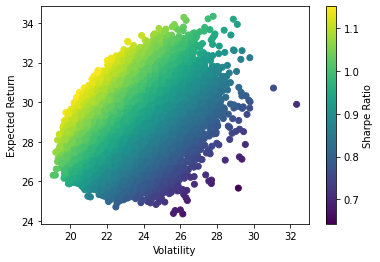

In [ ]:


# Define the portfolio_return_volatility() function
def portfolio_return_volatility(weights, mean_returns, cov_matrix):
    portfolio_return = np.dot(weights.T, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

# Define the number of simulations to run
num_portfolios = 100000

# Create an empty array to store the results
results = np.zeros((n+3,num_portfolios))

# Generate random weights and calculate portfolio return and volatility for each simulation
for i in range(num_portfolios):
    weights = np.random.random(n)
    weights /= np.sum(weights)
    portfolio_return, portfolio_volatility = portfolio_return_volatility(weights, mean_returns, cov_matrix)
    results[0,i] = portfolio_return
    results[1,i] = portfolio_volatility
    results[2,i] = (results[0,i] - 6.9 )/ results[1,i]
    results[3:n+3,i] = weights



# Plot the results
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='viridis')
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.show()




# Minimum Variance Portfolio

In [ ]:
min_vol_index = np.argmin(results[1,:])
print(min_vol_index)
print(results[3:n+2,min_vol_index])
print(results[0,min_vol_index],'portfolio_return')
print(results[1,min_vol_index],'portfolio_volatality')
print(results[2,min_vol_index],'sharpe ratio')

42787
[8.50794680e-02 1.72116551e-02 4.95714864e-02 3.36394585e-01
 2.07733539e-04 1.16951921e-01 5.62723295e-02 1.30385624e-01
 9.71129638e-02]
26.304455290400565 portfolio_return
19.068491711287184 portfolio_volatality
1.0176187809817445 sharpe ratio


#Max Sharpe Ratio



In [ ]:
max_sharpe_index = np.argmax(results[2,:])
print(max_sharpe_index)
print(results[3:n+2,max_sharpe_index])
print(results[0,max_sharpe_index],'portfolio_return')
print(results[1,max_sharpe_index],'portfolio_volatality')
print(results[2,max_sharpe_index],'sharpe ratio')

78624
[0.09943577 0.18259144 0.03607116 0.27962289 0.11950834 0.12373715
 0.0094226  0.02266921 0.03504875]
30.489983858228726 portfolio_return
20.497832933604013 portfolio_volatality
1.1508525771792912 sharpe ratio


#Accomodating the shortselling

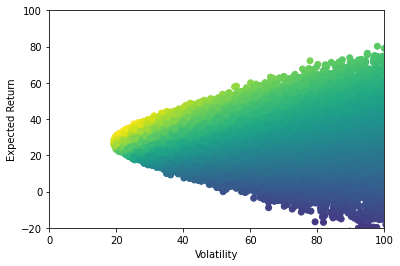

In [ ]:
# Define the portfolio_return_volatility() function
def portfolio_return_volatility(weights, mean_returns, cov_matrix):
    portfolio_return = np.dot(weights.T, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

# Define the number of simulations to run
num_portfolios = 100000

# Create an empty array to store the results
results = np.zeros((n+3,num_portfolios))

# Generate random weights and calculate portfolio return and volatility for each simulation
for i in range(num_portfolios):

    weights = np.random.randn(n)
    weights= weights/np.sum(weights)
    weights= np.array(weights)

    # Calculate portfolio return and volatility
    portfolio_return, portfolio_volatility = portfolio_return_volatility(weights, mean_returns, cov_matrix)
    # Store the results
    results[0,i] = portfolio_return
    results[1,i] = portfolio_volatility
    results[2,i] = (results[0,i]-6.9) / results[1,i]
    results[3:n+3,i] = weights
    
# Plot the results
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='viridis')
plt.xlabel('Volatility')
plt.xlim(0, 100)
plt.ylim(-20,100)
plt.ylabel('Expected Return')
plt.show()

# Minimum Variance Portfolio



In [ ]:
min_vol_index = np.argmin(results[1,:])
print(min_vol_index)
print(results[3:n+2,min_vol_index])
print(results[0,min_vol_index],'portfolio_return')
print(results[1,min_vol_index],'portfolio_volatality')
print(results[2,min_vol_index],'sharpe ratio')

38167
[ 0.09545256  0.06272871  0.08153594  0.22940844 -0.05712184  0.19008529
  0.01859037  0.16258942  0.07964134]
26.255828120238863 portfolio_return
19.30168133816176 portfolio_volatality
1.0028052883647005 sharpe ratio


In [ ]:
sum=0
for i in results[3:n+3,min_vol_index]:
  sum+=i
print(sum)

1.0


#Max Sharpe Ratio

In [ ]:
max_sharpe_index = np.argmax(results[2,:])
print(max_sharpe_index)
print(results[3:n+2,max_sharpe_index])
print(results[0,max_sharpe_index],'portfolio_return')
print(results[1,max_sharpe_index],'portfolio_volatality')
print(results[2,max_sharpe_index],'sharpe ratio')

5250
[ 0.02313712  0.2347624   0.14310163  0.25620987  0.3260088   0.10865573
 -0.2600024  -0.16040426  0.11740071]
37.33698753927437 portfolio_return
25.29400409972006 portfolio_volatality
1.2033281650180183 sharpe ratio


In [ ]:
sum=0
for i in results[3:n+3,max_sharpe_index]:
  sum+=i
print(sum)

0.9999999999999999


# Efficient Frontier using optimization (QP)

---





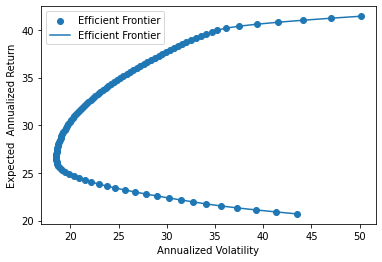

In [ ]:
from scipy.optimize import minimize

# Create an array of target portfolio returns for the efficient frontier
target_returns = np.linspace(min(mean_returns), max(mean_returns), num=100)

# Minimize portfolio volatility for each target portfolio return
def portfolio_volatility(weights, mean_returns, cov_matrix, target_return):
    portfolio_return = np.dot(weights.T, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_volatility

def portfolio_return_constraint(weights, target_return):
    return np.dot(weights.T, mean_returns) - target_return

efficient_frontier_volatilities = []
for target_return in target_returns:
    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return_constraint(x, target_return)},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for i in range(n))
    initial_guess = np.ones(n) / n
    result = minimize(portfolio_volatility, initial_guess, args=(mean_returns, cov_matrix, target_return), method='SLSQP', bounds=bounds, constraints=constraints)
    efficient_frontier_volatilities.append(result['fun'])

# Plot the efficient frontier
# plt.figure(figsize=(12, 8))
plt.scatter(efficient_frontier_volatilities, target_returns, label='Efficient Frontier')
plt.plot(efficient_frontier_volatilities, target_returns, label='Efficient Frontier')
plt.xlabel('Annualized Volatility')
plt.ylabel('Expected  Annualized Return')
plt.legend()
plt.show()

# Optimal Weights for Minimum Volatality in QP


In [ ]:
# Find the index of the minimum volatility point on the efficient frontier
min_volatility_idx = np.argmin(efficient_frontier_volatilities)

# Get the corresponding target return
min_volatility_target_return = target_returns[min_volatility_idx]

# Find the optimal weights for the minimum volatility point
constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return_constraint(x, min_volatility_target_return)},
               {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

bounds = tuple((0,1) for i in range(n))
initial_guess = np.ones(n) / n
result = minimize(portfolio_volatility, initial_guess, args=(mean_returns, cov_matrix, min_volatility_target_return), method='SLSQP', bounds=bounds, constraints=constraints)
min_volatility_weights = result['x']

# Calculate the corresponding expected return and volatility
min_volatility_return = np.dot(min_volatility_weights.T, mean_returns)
min_volatility = efficient_frontier_volatilities[min_volatility_idx]

# Print the results
print(f"Optimal weights for minimum volatility: {min_volatility_weights}")
print(f"Expected return for minimum volatility: {min_volatility_return:.4f}")
print(f"Volatility for minimum volatility: {min_volatility:.4f}")


Optimal weights for minimum volatility: [0.13677932 0.05311016 0.0038571  0.37897479 0.         0.13693133
 0.         0.10814847 0.05211799 0.13008085]
Expected return for minimum volatility: 26.7720
Volatility for minimum volatility: 18.5172


#Optimal Weights for Maximum Sharpe Ratio in QP

In [ ]:
# Set the risk-free rate
risk_free_rate = 6.9

def sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    portfolio_return = np.dot(weights.T, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    return -sharpe_ratio

# Find the optimal weights for the maximum Sharpe ratio
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0,1) for i in range(n))
initial_guess = np.ones(n) / n
result = minimize(sharpe_ratio, initial_guess, args=(mean_returns, cov_matrix, risk_free_rate), method='SLSQP', bounds=bounds, constraints=constraints)
max_sharpe_weights = result['x']

# Calculate the corresponding expected return and volatility
max_sharpe_return = np.dot(max_sharpe_weights.T, mean_returns)
max_sharpe_volatility = np.sqrt(np.dot(max_sharpe_weights.T, np.dot(cov_matrix, max_sharpe_weights)))
max_sharpe_ratio=(max_sharpe_return-risk_free_rate)/max_sharpe_volatility

# Print the results
print(f"Optimal weights for maximum Sharpe ratio: {max_sharpe_weights}")
print(f"Expected return for maximum Sharpe ratio: {max_sharpe_return:.5f}")
print(f"Volatility for maximum Sharpe ratio: {max_sharpe_volatility:.5f}")
print(f"Maximum Sharpe ratio: {max_sharpe_ratio:.5f}")


Optimal weights for maximum Sharpe ratio: [5.91711846e-02 1.99552386e-01 5.25906217e-02 3.18935009e-01
 1.10016482e-01 6.68691926e-02 3.18708467e-16 6.03778209e-18
 4.87801576e-02 1.44084967e-01]
Expected return for maximum Sharpe ratio: 30.94942
Volatility for maximum Sharpe ratio: 20.40496
Maximum Sharpe ratio: 1.17861


#Short Selling allowed..


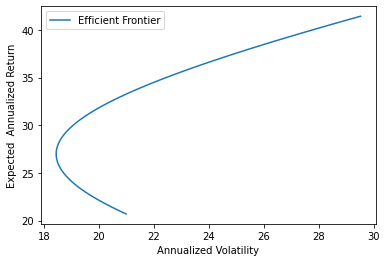

In [ ]:
from scipy.optimize import minimize

# Create an array of target portfolio returns for the efficient frontier
target_returns = np.linspace(min(mean_returns), max(mean_returns), num=100)

# Minimize portfolio volatility for each target portfolio return
def portfolio_volatility(weights, mean_returns, cov_matrix, target_return):
    portfolio_return = np.dot(weights.T, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_volatility

def portfolio_return_constraint(weights, target_return):
    return np.dot(weights.T, mean_returns) - target_return

efficient_frontier_volatilities = []
for target_return in target_returns:
    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return_constraint(x, target_return)},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((-1,1) for i in range(n))
    initial_guess = np.ones(n) / n
    result = minimize(portfolio_volatility, initial_guess, args=(mean_returns, cov_matrix, target_return), method='SLSQP', bounds=bounds, constraints=constraints)
    efficient_frontier_volatilities.append(result['fun'])

# Plot the efficient frontier
# plt.figure(figsize=(12, 8))
plt.plot(efficient_frontier_volatilities, target_returns, label='Efficient Frontier')
plt.xlabel('Annualized Volatility')
plt.ylabel('Expected  Annualized Return')
plt.legend()


##Optimum Weights for minimum Volatility when shortselling is also allowed

In [ ]:
# Find the index of the minimum volatility point on the efficient frontier
min_volatility_idx = np.argmin(efficient_frontier_volatilities)

# Get the corresponding target return
min_volatility_target_return = target_returns[min_volatility_idx]

# Find the optimal weights for the minimum volatility point
constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return_constraint(x, min_volatility_target_return)},
               {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

bounds = tuple((-1,1) for i in range(n))
initial_guess = np.ones(n) / n
result = minimize(portfolio_volatility, initial_guess, args=(mean_returns, cov_matrix, min_volatility_target_return), method='SLSQP', bounds=bounds, constraints=constraints)
min_volatility_weights = result['x']

# Calculate the corresponding expected return and volatility
min_volatility_return = np.dot(min_volatility_weights.T, mean_returns)
min_volatility = efficient_frontier_volatilities[min_volatility_idx]

# Print the results
print(f"Optimal weights for minimum volatility: {min_volatility_weights}")
print(f"Expected return for minimum volatility: {min_volatility_return:.4f}")
print(f"Volatility for minimum volatility: {min_volatility:.4f}")


Optimal weights for minimum volatility: [ 0.14549449  0.05243945  0.01144325  0.37846419 -0.00265581  0.15330217
 -0.04782167  0.12190069  0.05770664  0.1297266 ]
Expected return for minimum volatility: 26.9815
Volatility for minimum volatility: 18.4386


##Optimum Weights for maximum sharpe ratio when shortselling is also allowed


In [ ]:
# Set the risk-free rate
risk_free_rate = 6.9

def sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    portfolio_return = np.dot(weights.T, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    return -sharpe_ratio

# Find the optimal weights for the maximum Sharpe ratio
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((-1,1) for i in range(n))
initial_guess = np.ones(n) / n
result = minimize(sharpe_ratio, initial_guess, args=(mean_returns, cov_matrix, risk_free_rate), method='SLSQP', bounds=bounds, constraints=constraints)
max_sharpe_weights = result['x']

# Calculate the corresponding expected return and volatility
max_sharpe_return = np.dot(max_sharpe_weights.T, mean_returns)
max_sharpe_volatility = np.sqrt(np.dot(max_sharpe_weights.T, np.dot(cov_matrix, max_sharpe_weights)))
max_sharpe_ratio=(max_sharpe_return-risk_free_rate)/max_sharpe_volatility

# Print the results
print(f"Optimal weights for maximum Sharpe ratio: {max_sharpe_weights}")
print(f"Expected return for maximum Sharpe ratio: {max_sharpe_return:.5f}")
print(f"Volatility for maximum Sharpe ratio: {max_sharpe_volatility:.5f}")
print(f"Maximum Sharpe ratio: {max_sharpe_ratio:.5f}")


Optimal weights for maximum Sharpe ratio: [ 0.09919758  0.20547361  0.09679826  0.31169224  0.18415977  0.12420345
 -0.23084455 -0.00784845  0.06785799  0.1493101 ]
Expected return for maximum Sharpe ratio: 33.64038
Volatility for maximum Sharpe ratio: 21.27884
Maximum Sharpe ratio: 1.25667


#Comparision


#Shortselling allowed and Monte Carlo and Quadratic

In [ ]:

# Define the number of simulations to run
num_portfolios = 100000

# Create an empty array to store the results
results = np.zeros((n+3,num_portfolios))

# Generate random weights and calculate portfolio return and volatility for each simulation
for i in range(num_portfolios):

    weights = np.random.randn(n)
    weights= weights/np.sum(weights)
    weights= np.array(weights)
    # Calculate portfolio return and volatility
    portfolio_return, portfolio_volatility = portfolio_return_volatility(weights, mean_returns, cov_matrix)
    # Store the results
    results[0,i] = portfolio_return
    results[1,i] = portfolio_volatility
    results[2,i] = (results[0,i]-6.9) / results[1,i]
    results[3:n+3,i] = weights

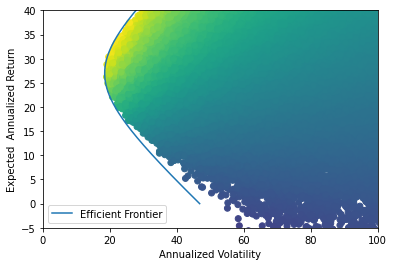

In [ ]:
from scipy.optimize import minimize

# Create an array of target portfolio returns for the efficient frontier
target_returns = np.linspace(0,50,num=1000)

# Minimize portfolio volatility for each target portfolio return
def portfolio_volatility(weights, mean_returns, cov_matrix, target_return):
    portfolio_return = np.dot(weights.T, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_volatility

def portfolio_return_constraint(weights, target_return):
    return np.dot(weights.T, mean_returns) - target_return

efficient_frontier_volatilities = []
for target_return in target_returns:
    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return_constraint(x, target_return)},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((-1,1) for i in range(n))
    initial_guess = np.ones(n) / n
    result = minimize(portfolio_volatility, initial_guess, args=(mean_returns, cov_matrix, target_return), method='SLSQP', bounds=bounds, constraints=constraints)
    efficient_frontier_volatilities.append(result['fun'])

# Plot the efficient frontier
# plt.figure(figsize=(12, 8))
plt.plot(efficient_frontier_volatilities, target_returns, label='Efficient Frontier')
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='viridis')
plt.xlim(0, 100)
plt.ylim(-5,40)
plt.xlabel('Annualized Volatility')
plt.ylabel('Expected  Annualized Return')
plt.legend()


# Shortselling Not allowed 

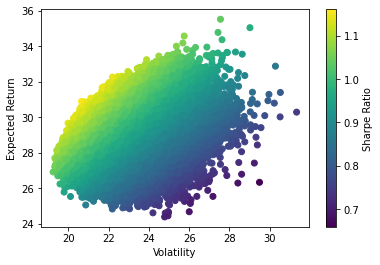

In [ ]:


# Define the portfolio_return_volatility() function
def portfolio_return_volatility(weights, mean_returns, cov_matrix):
    portfolio_return = np.dot(weights.T, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

# Define the number of simulations to run
num_portfolios = 100000

# Create an empty array to store the results
results = np.zeros((n+3,num_portfolios))

# Generate random weights and calculate portfolio return and volatility for each simulation
for i in range(num_portfolios):
    weights = np.random.random(n)
    weights /= np.sum(weights)
    portfolio_return, portfolio_volatility = portfolio_return_volatility(weights, mean_returns, cov_matrix)
    results[0,i] = portfolio_return
    results[1,i] = portfolio_volatility
    results[2,i] = (results[0,i] - 6.9 )/ results[1,i]
    results[3:n+3,i] = weights



# Plot the results
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='viridis')
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.show()




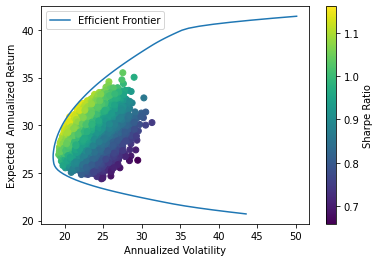

In [ ]:
from scipy.optimize import minimize

# Create an array of target portfolio returns for the efficient frontier
target_returns = np.linspace(min(mean_returns), max(mean_returns), num=100)

# Minimize portfolio volatility for each target portfolio return
def portfolio_volatility(weights, mean_returns, cov_matrix, target_return):
    portfolio_return = np.dot(weights.T, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_volatility

def portfolio_return_constraint(weights, target_return):
    return np.dot(weights.T, mean_returns) - target_return

efficient_frontier_volatilities = []
for target_return in target_returns:
    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return_constraint(x, target_return)},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for i in range(n))
    initial_guess = np.ones(n) / n
    result = minimize(portfolio_volatility, initial_guess, args=(mean_returns, cov_matrix, target_return), method='SLSQP', bounds=bounds, constraints=constraints)
    efficient_frontier_volatilities.append(result['fun'])

# Plot the efficient frontier
# plt.figure(figsize=(12, 8))
plt.plot(efficient_frontier_volatilities, target_returns, label='Efficient Frontier')
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='viridis')
plt.xlabel('Annualized Volatility')
plt.ylabel('Expected  Annualized Return')
plt.colorbar(label='Sharpe Ratio')
plt.legend()
plt.show()